In [1]:
import psi4
import numpy as np
import nglview

from helper_PFCI import PFHamiltonianGenerator

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
import numpy as np
def write_h2_dimer_coordinate_string(ra, rb, dx, dz, dimer=True):
    """
    A function to create a geometry string in psi4 format for an H2 dimer where
    monomer a has a bondlength ra and monomer b has a bondlength rb. 
    Both monomers are in the x-z plane and have their internuclear axes oriented along the x-axis.
    Monomer a has its center of mass at the origin, monomer b is displaced by dx along the x-axis
    and dz along the z-axis.
    
    Arguments
    ---------
    ra : float
    Bondlength of monomer a in Angstroms.
    rb : float
    Bondlength of monomer b in Angstroms.
    dx : float
    Displacement of monomer b along the x-axis in Angstroms.
    dz : float
    Displacement of monomer b along the z-axis in Angstroms.
    
    Returns
    -------
    A string in psi4 format.
    
    """
    # create list of x-values for monomer A and B
    x_list = np.array([-ra/2, ra/2, -rb/2 + dx, rb/2 + dx])
    
    # create list of y-values for monomer A and B
    y_list = np.array([0, 0, 0, 0])
    
    # create list of z-values for monomer A and B
    z_list = np.array([0, 0, dz, dz])
    
    # create a string representation of these coordinates
    mol_string = ''

    if dimer:
        for i in range(4):
            mol_string += f'H {x_list[i]} {y_list[i]} {z_list[i]}\n'
            
        mol_string += 'symmetry c1\n'
        mol_string += 'nocom\n'
        mol_string += 'noreorient'

    else:
        for i in range(2):
            mol_string += f'H {x_list[i]} {y_list[i]} {z_list[i]}\n'
        
        mol_string += 'symmetry c1\n'
        mol_string += 'nocom\n'
        mol_string += 'noreorient'
    
    return mol_string


In [3]:
h2_monomer_string = write_h2_dimer_coordinate_string(0.74, 0.74, 0.5, 2.0, dimer = False)

options_dict = {
    "basis": "6-311G**",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    'num_roots' : 3
}




psi4.set_options(options_dict)
h2_dimer = psi4.geometry(h2_monomer_string)
scf_e, wfn = psi4.energy('SCF', return_wfn=True)
fci_energy, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)
eg_diss = wfn.variable("CI ROOT 0 TOTAL ENERGY")
e1_diss = wfn.variable("CI ROOT 1 TOTAL ENERGY")





Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEM9LYY31VAWS
*** at Fri Feb 21 16:30:11 2025

   => Loading Basis Set <=

    Name: 6-311G**
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2 entry H          line    32 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/6-311gss.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c1
    Full point group: D_inf_h

    Geometry (in

In [5]:


options_dict = {
    "basis": "6-311G**",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    'num_roots' : 3
}

cavity_dict = {
        'omega_value' : 0.4971944221200322,
        'lambda_vector' : np.array([0.1, 0, 0.0]),
        'ci_level' : 'fci',
        'davidson_roots' : 6,
        'number_of_photons' : 5,
        'rdm_root' : 0,
        'photon_number_basis' : True,
        'canonical_mos' : True,
        'coherent_state_basis' : False
}



In [6]:
h2_geom_string = write_h2_dimer_coordinate_string(0.74, 0.74, 0.5, 2.0)

h2_dimer = psi4.geometry(h2_geom_string)
view = nglview.show_psi4(h2_dimer)
view



NGLWidget()

In [7]:

options_dict = {
    "basis": "6-311G**",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    'num_roots' : 3
}


cavity_dict = {
        'omega_value' : 0.4971944221200322,
        'lambda_vector' : np.array([0.1, 0., 0.0]),
        'ci_level' : 'fci',
        'davidson_roots' : 6,
        'number_of_photons' : 5,
        'rdm_root' : 0,
        'photon_number_basis' : True,
        'canonical_mos' : True,
        'coherent_state_basis' : False
}



psi4.set_options(options_dict)



In [8]:

dz_list = np.linspace(0.5, 3.0, 30)

eg = []
e1 = []

eg_rel_egdiss = []
e1_rel_egdiss = []
e1_rel_e1diss = []

# set up geometry string
h2_geom_string = write_h2_dimer_coordinate_string(0.74, 0.74, 0.5, 200)
h2_dimer = psi4.geometry(h2_geom_string)
scf_e, wfn = psi4.energy('SCF', return_wfn=True)
fci_energy, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)
eg_diss = wfn.variable("CI ROOT 0 TOTAL ENERGY")
e1_diss = wfn.variable("CI ROOT 1 TOTAL ENERGY")

test_pf = PFHamiltonianGenerator(
        h2_geom_string,
        options_dict,
        cavity_dict
)

qed_eg = [test_pf.CIeigs[0]]
qed_e1 = [test_pf.CIeigs[1]]
qed_e2 = [test_pf.CIeigs[2]]
qed_e3 = [test_pf.CIeigs[3]]
qed_e4 = [test_pf.CIeigs[4]]
qed_e5 = [test_pf.CIeigs[5]]



for dz in dz_list:
    h2_geom_string = write_h2_dimer_coordinate_string(0.74, 0.74, 0.5, dz)
    h2_dimer = psi4.geometry(h2_geom_string)
    scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    fci_energy, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)
    eg_val = wfn.variable("CI ROOT 0 TOTAL ENERGY") 
    e1_val = wfn.variable("CI ROOT 1 TOTAL ENERGY")
    eg.append(eg_val)
    e1.append(e1_val)
    eg_rel_egdiss.append(eg_val-eg_diss)
    e1_rel_egdiss.append(e1_val-eg_diss)
    e1_rel_e1diss.append(e1_val-e1_diss)
    test_pf = PFHamiltonianGenerator(
        h2_geom_string,
        options_dict,
        cavity_dict)
    qed_eg.append(test_pf.CIeigs[0])
    qed_e1.append(test_pf.CIeigs[1])
    qed_e2.append(test_pf.CIeigs[2])
    qed_e3.append(test_pf.CIeigs[3])
    qed_e4.append(test_pf.CIeigs[4])
    qed_e5.append(test_pf.CIeigs[5])
    


Scratch directory: /tmp/
   => Libint2 <=

    Primary   basis highest AM E, G, H:  5, 4, 3
    Auxiliary basis highest AM E, G, H:  6, 5, 4
    Onebody   basis highest AM E, G, H:  6, 5, 4
    Solid Harmonics ordering:            gaussian

*** tstart() called on CHEM9LYY31VAWS
*** at Fri Feb 21 16:31:25 2025

   => Loading Basis Set <=

    Name: 6-311G**
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-4 entry H          line    32 file /Users/jfoley19/Code/psi4/objdir-Release/stage/share/psi4/basis/6-311gss.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c1
    Full point group: Cs

    Geometry (in Angs

PSIO_ERROR: Attempt to write into next entry: 35, SO-basis Potential Energy Ints
PSIO_ERROR: unit = 35, errval = 18
PSIO_ERROR: 18 (Incorrect block end address)



RuntimeError: 
Fatal Error: PSIO_ERROR: 18 (Incorrect block end address)

Error occurred in file: /Users/jfoley19/Code/psi4/psi4/src/psi4/libpsio/error.cc on line: 135
The most recent 5 function calls were:



ValueError: x and y must have same first dimension, but have shapes (30,) and (0,)

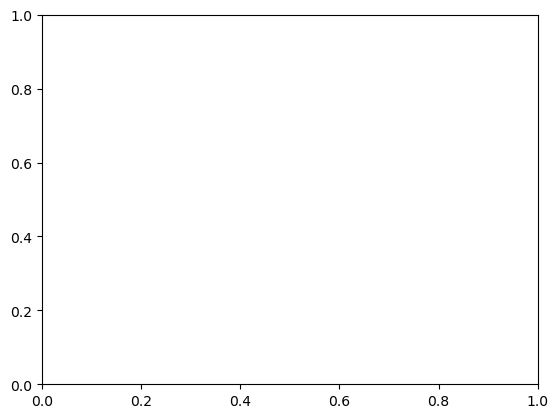

In [9]:
from matplotlib import pyplot as plt

plt.plot(dz_list, eg, 'red', label="Eg")
plt.plot(dz_list, qed_eg[1:], 'black', label="qed-eg")
plt.plot(dz_list, qed_e2[1:], 'blue', label="qed-e1")
plt.plot(dz_list, qed_e3[1:], 'red', label="qed-e2")
plt.plot(dz_list, qed_e4[1:], 'purple', label="qed-e4")
plt.plot(dz_list, e1, 'red', label="E1")
#plt.plot(dz_list, e2, label="E2")
#plt.plot(dz_list, e3, label="E3")
#plt.plot(dz_list, e4, label="E4")
plt.xlim(0.8,3)
plt.legend()
plt.show()

plt.plot(dz_list, eg_rel_egdiss, label="Eg")
plt.plot(dz_list, e1_rel_egdiss, label="E1")
plt.plot(dz_list, e1_rel_e1diss, label="E1p")
plt.xlim(0.8,3)
plt.legend()
plt.show()

In [ ]:

from helper_PFCI import PFHamiltonianGenerator


In [ ]:
options_dict = {
        "basis": "6-311G**",
        "scf_type": "pk",
        "e_convergence": 1e-10,
        "d_convergence": 1e-10,
}

cavity_dict = {
        'omega_value' : 0.,
        'lambda_vector' : np.array([0, 0, 0.0]),
        'ci_level' : 'fci',
        'davidson_roots' : 4,
        'number_of_photons' : 0,
        'rdm_root' : 0,
        'photon_number_basis' : True,
        'canonical_mos' : True,
        'coherent_state_basis' : False
}

test_pf = PFHamiltonianGenerator(
        h2_geom_string,
        options_dict,
        cavity_dict
)


In [ ]:
print(test_pf.CIeigs)

In [ ]:
print(eg_diss)